In [1]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph

In [2]:
graph = ChemicalSpaceGraph.from_file('../cache.h5', '../cache-euclidean.p')
len(graph.edges)

840456

In [3]:
import numpy as np
import pandas as pd

In [4]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])

In [5]:
edges.describe()

,2
count,840456.000000
mean,27.260377
std,5.837445
min,4.675808
25%,23.005713
50%,27.248053
75%,31.392517
max,50.933195


In [12]:
for i in range(5):
    t = i * 5 + 5
    print(t, len(edges[edges[2] < t]))

5 1
10 126
15 9312
20 96739
25 302980


In [7]:
from matplotlib import pyplot as plt
f = graph.fingerprints_df['Cn1ccc2oc(=O)cnc21']
x = np.arange(len(f))

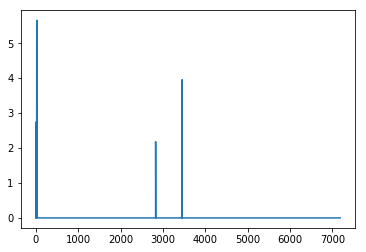

In [8]:
plt.plot(x, f)

In [9]:
from gephistreamer import graph as gephi_graph, streamer

In [11]:
gephi_nodes = [gephi_graph.Node(x) for x in graph.nodes]

In [16]:
gephi_edges = [
    gephi_graph.Edge(x, y, directed=False, weight=1 - graph.edges[(x, y)] / 15)
    for x, y in graph.edges
    if graph.edges[(x, y)] < 15
]
print(len(gephi_edges))

9312


In [18]:
stream = streamer.Streamer(streamer.GephiWS(workspace='15'))

In [19]:
stream.add_node(*gephi_nodes)
stream.add_edge(*gephi_edges)

In [21]:
gephi_edges10 = [
    gephi_graph.Edge(x, y, directed=False, weight=1 - graph.edges[(x, y)] / 10)
    for x, y in graph.edges
    if graph.edges[(x, y)] < 10
]
print(len(gephi_edges10))

126


In [22]:
stream = streamer.Streamer(streamer.GephiWS(workspace='10'))
stream.add_node(*gephi_nodes)
stream.add_edge(*gephi_edges10)

In [23]:
def show(threshold, gephi_nodes):
    gephi_edges_ = [
        gephi_graph.Edge(x, y, directed=False, weight=1 - graph.edges[(x, y)] / threshold)
        for x, y in graph.edges
        if graph.edges[(x, y)] < threshold
    ]
    print(len(gephi_edges_))
    stream = streamer.Streamer(streamer.GephiWS(workspace=str(threshold)))
    stream.add_node(*gephi_nodes)
    stream.add_edge(*gephi_edges_)

In [24]:
show(13, gephi_nodes)

2194
